In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from PIL import Image

In [ ]:
def check_image_dir(path):
    for fn in glob.glob(path):
        if not check_image(fn):
            print("Corrupt image or wrong format: {}".format(fn))
            os.remove(fn)


def check_image(fn):
    try:
        im = Image.open(fn)
        im.verify()
        return im.format=='JPEG'
    except:
        return False


def display_dataset(dataset, labels=None, n=10, classes=None):
    fig,ax = plt.subplots(1,n,figsize=(15,3))
    for i in range(n):
        ax[i].imshow(dataset[i])
        ax[i].axis('off')
        if classes is not None and labels is not None:
            ax[i].set_title(classes[labels[i][0]])

In [ ]:
if not os.path.exists('data/kagglecatsanddogs_5340.zip'):
    !wget -P data https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-08-21 12:25:07--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.72.44.156, 2600:1417:3f:1291::317f, 2600:1417:3f:1289::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.72.44.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘data/kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   281MB/s    in 2.8s    

2022-08-21 12:25:10 (281 MB/s) - ‘data/kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
import zipfile
if not os.path.exists('data/PetImages'):
    with zipfile.ZipFile('data/kagglecatsanddogs_5340.zip', 'r') as zip_ref:
        zip_ref.extractall('data')

In [ ]:
check_image_dir('data/PetImages/Cat/*.jpg')
check_image_dir('data/PetImages/Dog/*.jpg')

Corrupt image or wrong format: data/PetImages/Cat/2021.jpg
Corrupt image or wrong format: data/PetImages/Cat/8415.jpg
Corrupt image or wrong format: data/PetImages/Cat/7978.jpg
Corrupt image or wrong format: data/PetImages/Cat/10874.jpg
Corrupt image or wrong format: data/PetImages/Cat/850.jpg
Corrupt image or wrong format: data/PetImages/Cat/11086.jpg
Corrupt image or wrong format: data/PetImages/Cat/8553.jpg
Corrupt image or wrong format: data/PetImages/Cat/5077.jpg
Corrupt image or wrong format: data/PetImages/Cat/3710.jpg
Corrupt image or wrong format: data/PetImages/Cat/6029.jpg
Corrupt image or wrong format: data/PetImages/Cat/4874.jpg
Corrupt image or wrong format: data/PetImages/Cat/9361.jpg
Corrupt image or wrong format: data/PetImages/Cat/391.jpg
Corrupt image or wrong format: data/PetImages/Cat/3300.jpg
Corrupt image or wrong format: data/PetImages/Cat/12080.jpg
Corrupt image or wrong format: data/PetImages/Cat/10501.jpg
Corrupt image or wrong format: data/PetImages/Cat/3491

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

Corrupt image or wrong format: data/PetImages/Dog/4134.jpg
Corrupt image or wrong format: data/PetImages/Dog/7514.jpg
Corrupt image or wrong format: data/PetImages/Dog/50.jpg
Corrupt image or wrong format: data/PetImages/Dog/4654.jpg
Corrupt image or wrong format: data/PetImages/Dog/7969.jpg
Corrupt image or wrong format: data/PetImages/Dog/10863.jpg
Corrupt image or wrong format: data/PetImages/Dog/1866.jpg
Corrupt image or wrong format: data/PetImages/Dog/1308.jpg
Corrupt image or wrong format: data/PetImages/Dog/11675.jpg
Corrupt image or wrong format: data/PetImages/Dog/5604.jpg
Corrupt image or wrong format: data/PetImages/Dog/2479.jpg
Corrupt image or wrong format: data/PetImages/Dog/9967.jpg
Corrupt image or wrong format: data/PetImages/Dog/7369.jpg
Corrupt image or wrong format: data/PetImages/Dog/9043.jpg
Corrupt image or wrong format: data/PetImages/Dog/7112.jpg
Corrupt image or wrong format: data/PetImages/Dog/2494.jpg
Corrupt image or wrong format: data/PetImages/Dog/6718.j

In [ ]:
data_dir = 'data/PetImages'
batch_size = 64
ds_train = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 13,
    image_size = (224,224),
    batch_size = batch_size
)
ds_test = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 13,
    image_size = (224,224),
    batch_size = batch_size
)

Found 24769 files belonging to 2 classes.
Using 19816 files for training.
Found 24769 files belonging to 2 classes.
Using 4953 files for validation.


Training batch shape: features=(64, 224, 224, 3), labels=(64,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


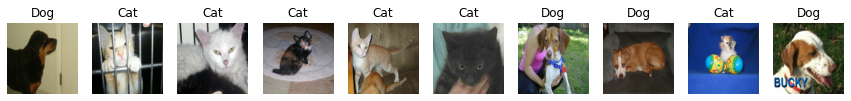

In [ ]:
for x,y in ds_train:
    print(f"Training batch shape: features={x.shape}, labels={y.shape}")
    x_sample, y_sample = x,y
    break
    
display_dataset(x_sample.numpy().astype(np.int),np.expand_dims(y_sample,1),classes=ds_train.class_names)

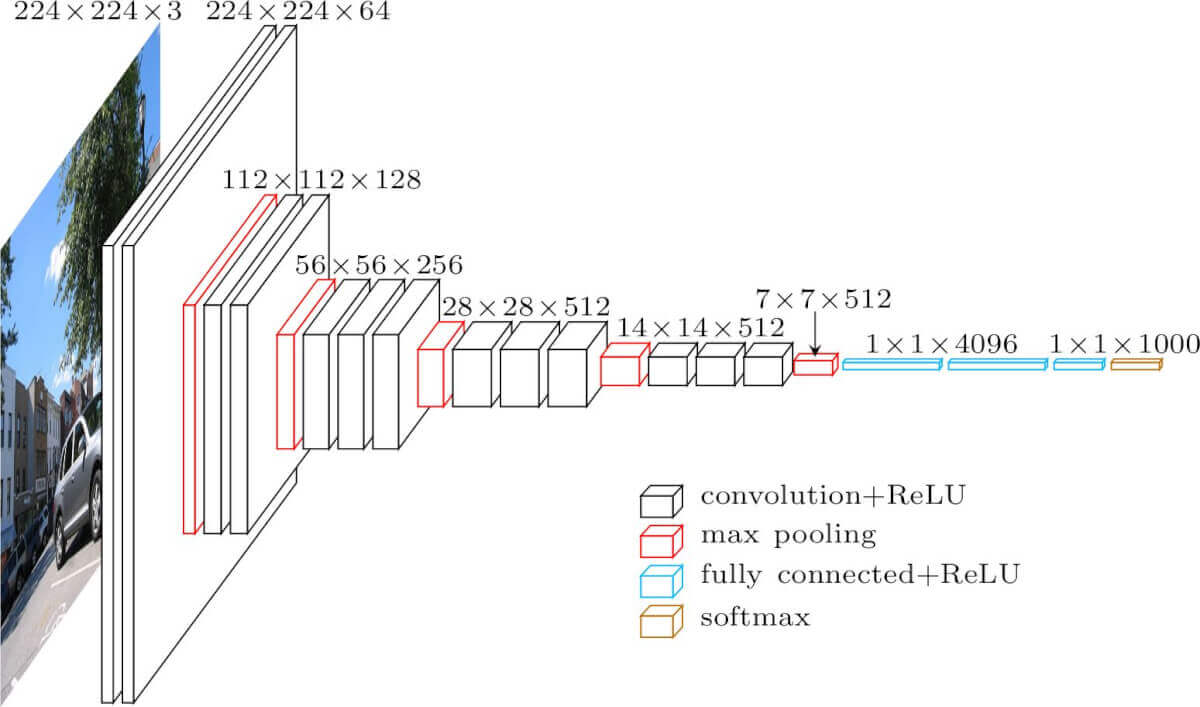

In [ ]:
vgg = keras.applications.VGG16()
inp = keras.applications.vgg16.preprocess_input(x_sample[:1])

res = vgg(inp)
print(f"Most probable class = {tf.argmax(res,1)}")

keras.applications.vgg16.decode_predictions(res.numpy())

553476096/553467096 [==============================] - 3s 0us/step
Most probable class = [234]
49152/35363 [=========================================] - 0s 0us/step


[[('n02106550', 'Rottweiler', 0.80609983),
  ('n02089078', 'black-and-tan_coonhound', 0.07173899),
  ('n02107312', 'miniature_pinscher', 0.025838895),
  ('n02107142', 'Doberman', 0.021859342),
  ('n02101006', 'Gordon_setter', 0.017213302)]]

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

58900480/58889256 [==============================] - 1s 0us/step
Shape after applying VGG-16: (7, 7, 512)


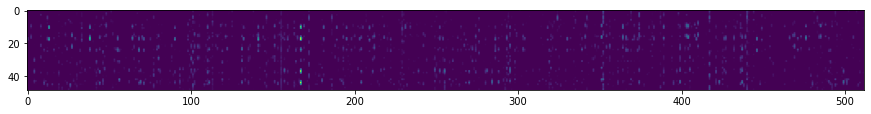

In [ ]:
vgg = keras.applications.VGG16(include_top=False)

inp = keras.applications.vgg16.preprocess_input(x_sample[:1])
res = vgg(inp)
print(f"Shape after applying VGG-16: {res[0].shape}")
plt.figure(figsize=(15,3))
plt.imshow(res[0].numpy().reshape(-1,512))

In [ ]:
ds_features_train = ds_train.take(50).map(lambda x,y : (vgg(x),y))
ds_features_test = ds_test.take(10).map(lambda x,y : (vgg(x),y))

for x,y in ds_features_train:
    print(x.shape,y.shape)
    break

(64, 7, 7, 512) (64,)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(7,7,512)),# 7*7*512
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(ds_features_train, validation_data=ds_features_test)

50/50 [==============================] - 1164s 23s/step - loss: 1.3544 - acc: 0.9200 - val_loss: 1.2918 - val_acc: 0.9406
